Author : Yingwei Li
<h1> Introduction</h1>
<br>
In this Project we will be exploring prime numbers and snail graphs. What is a prime number? <br>A prime number is a integer that is bigger than itself and is only divisible by itself and 1. For example the number 13, the number is only divisible by 13 and 1 hence it is a prime number. The amount of prime numbers are infinite for example here is a list of prime numbers to 50 $$[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]$$
<br>
Something cool about prime numbers is that all numbers can be made by multipling prime numbers together. The list of prime numbers that add up to the number is know as the primary decomposition of the number. For example for 50 the primary decomposition is :$$[2,5,5]$$

<br>
What is a snail graph?<br> A snail graph Displays the x-y plane in a spiral behavaior. Each cordinate represents a number that is increased by one each time. <br><br> In this project I will experienment on how prime numbers can effect the shape of a snail graph.

<br>

In [2]:
import matplotlib.pyplot as plt

def isprime(num):
  #if i is in range of 2 to number
  for i in range (2,num):
    #if the num is divisible by any number then it is not prime so return false
    if(num%i ==0 & i != num):
        return False
  return True

<h4> Define isprime(n) : </h4>  isprime(n) takes in a number n and determines whether or not the number is divisible, if it is not
then it returns True, otherwise it returns false

In [3]:
#example of isprime(n)
print(isprime(2),isprime(3),isprime(6),isprime(12))

True True False False


In [4]:
def myprimes(num):
  #empty list to store prime numbers
  primelist = []
  #loop through 2 to num +1 to determine if the number is prime
  for i in range (2,num+1):
    if(isprime(i)):
      #if the number is prime add it to primelist
      primelist.append(i)
  return primelist

<h4>Define myprimes(num):</h4>
    myprimes(num) takes in a number and loops to generate a list of prime numbers by using the isprime(n) function
    to determine if a number is prime and returns
    

In [45]:
#example of myprimes(num)
print(myprimes(50))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]


In [6]:
def primedec(num):
  #Stores the prime dec of num
  decList = []
  #Counter to hold the current number since it changes after division
  counter = num
  #if the number is prime, return the number as an array
  if(isprime(num)):
    return [num]
  else:
    #while the counter is not prime, it will continue
    while(isprime(counter) == False):
      #loops from 2 to counter
      for i in range (2,counter):
        #finds divisor and updates counter and adds the divisor to the list
        if(counter%i == 0):
            decList.append(i)
            counter = int(counter / i)
            break;
  decList.append(counter) 
  return decList
  

<h4>Define primedec(num):</h4>
primedec takes in a number and generates a list of primary decompositions of the number

In [46]:
#example of primedec(num)
print(primedec(50))

[2, 5, 5]


<h2>My attempt at the Snail graph</h2>
While I was trying to figure out how to do the snail graph, I was able to figure out a pattern that helped me generate
the list of cordinate in a organized fashion. I noticed that the points follow a pattern of always "right","up","left",and "down" in the order of [1,1,2,2,3,3] <br>ie. ['right', 'up', 'left', 'left', 'down', 'down', 'right', 'right', 'right', 'up', 'up', 'up'] such that every other number increases by 1
<br>
<br>
My Approach to the snail graph was to take a number, break it down into a list of patterns and from that list, generate a list of actions that needs to be taken.
<br>Example : 13 -> [1,1,2,2,3,3] -> ['right', 'up', 'left', 'left', 'down', 'down', 'right', 'right', 'right', 'up', 'up', 'up'].
<br><br> Effect of Direction to a cordinate:
<br>"right":&nbsp;&nbsp;&nbsp; x+1, y
<br>"up": &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;x&nbsp;&nbsp;&nbsp;&nbsp;, y+1
<br>"left":&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; x-1&nbsp;, y
<br>"down" : x&nbsp;&nbsp;&nbsp;&nbsp;, y -1
<bR>My code then takes a number, breaks it down into a list and loops using the direction list and effect of the cordinates to generate a x and y list to graph


In [8]:
#input is the number you want to generate up to
def getPattern(input):
  #list to store the amount of actions
  actions = []
  #counter used to loop 
  counter = 1
  k=0
  #while the counter is less than the input
  while(counter <= input):
    #increment the pattern by 1
    k = k+1
    #if the counter +k is less than the input, add k to actions and counter = counter +k
    if(counter + k <= input):
        actions.append(k)
        counter= counter +k
    else:
      #if the input - counter is not equal to 0 then find the remaining pattern
      if(input - counter != 0):
        actions.append(input-counter)
        counter = counter + (input-counter)
    #since this pattern requires a repeat, ie 1,1,2,2 we must do the action twice
    if(counter + k <=input):
      counter = counter +k
      actions.append(k)
    else:
      if(input - counter != 0):
          actions.append(input-counter)
          counter = counter + (input-counter)
      break
  return actions

<h4>Define getPattern(input):</h4>
The function takes in a number and breaks it down into a list with the pattern of [1,1,2,2...]. If the pattern doesnt end with a repeat, it adds the remainer to the end of the list.
<br> Example: 14 = [1,1,2,2,3,3,1] 

In [9]:
#example of getPattern(input)
print(getPattern(52))

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 2]


In [10]:
#num is a number you want to generate up to
def getActionSteps(num):
  #define the directions
  left = "left"
  right = "right"
  up = "up"
  down = "down"
  #number holder to determine direction
  actnum = 0
  #gets the pattern list 
  pattern = getPattern(num) 
  #array to hold the directions
  actions = []
  #loops through the pattern list
  for i in range (len(pattern)):
    x = pattern[i]
    #if the actnum is 0 then loop through x and add that many directions of right and change actnum to 1
    if(actnum ==0):
      for k in range(x):
        actions.append(right)
      actnum = 1
      continue
     #if the actnum is 1 then loop through x and add that many directions of up and change actnum to 2
    if(actnum ==1):
      for k in range(x):
        actions.append(up)
      actnum = 2
      continue
     #if the actnum is 2 then loop through x and add that many directions of left and change actnum to 3
    if(actnum ==2):
      for k in range(x):
        actions.append(left)
      actnum = 3
      continue
     #if the actnum is 3 then loop through x and add that many directions of right and change actnum to 0
    if(actnum ==3):
      for k in range(x):
        actions.append(down)
      actnum = 0
      continue
  
  return actions

<h4>Define getActionSteps(num):</h4>
getActionSteps takes in a number, generates a list of patterns using getPattern(num) and converts it into a list of actions.<br>
ie : 13 -> [1,1,2,2,3,3] -> ['right', 'up', 'left', 'left', 'down', 'down', 'right', 'right', 'right', 'up', 'up', 'up']

In [11]:
#example of getActionSteps(num)
print(getActionSteps(15))

['right', 'up', 'left', 'left', 'down', 'down', 'right', 'right', 'right', 'up', 'up', 'up', 'left', 'left']


In [12]:
#direction is a string of either right, up, left, or down
#x,y are the x and y cordinates you are currently at
def stepCordinate(direction,x,y):
  #if the direction is right return (x+1,y)
  if(direction == "right"):
    return (x+1,y)
  #if the direction is up return (x,y+1)
  elif(direction =="up"):
    return (x, y+1)
  #if the direction is left return (x-1,y)
  elif(direction == "left"):
    return (x -1, y)
  #if the direction is down return (x,y-1)
  elif(direction == "down"):
    return (x, y-1)

<h4>Define stepCordinate(direction,x,y)</h4>
stepCordinate takes in a direction and a x, y cordiate. It returns the new x , y cordinate based on the given direction

In [13]:
#example of stepCordinate(direction,x,y)
print(stepCordinate("right",0,0))

(1, 0)


In [14]:
#num is the number you want to generate up to
def getXandYForNum(num):
  #get the list of actions based on the number
  steps = getActionSteps(num)
  #list to store the x cordinates
  xpoints = [0]
  #list to store the y cordinates
  ypoints = [0]
  #current x cordinate
  xcord = 0
  #current y cordinate
  ycord = 0
  #loop through the list of directions
  for x in range(len(steps)):
    #determine the new x and y cordinates after the action
    newx, newy = stepCordinate(steps[x],xcord,ycord)
    #add the new cordinates to their respective list
    xpoints.append(newx)
    ypoints.append(newy)
    #updates the current x and y cordinates
    xcord = newx
    ycord = newy
  return xpoints, ypoints

<h4>Define getXandYForNum(num)</h4>
This function puts all the functions together to generate the x and y list for the snail graph. It takes in a number and returns the the list of snail graph points for x and y

In [15]:
#Example for getXandYForNum
x,y = getXandYForNum(13)
print("x cordinates = {x},  y cordinates = {y}".format(x = x, y=y))

x cordinates = [0, 1, 1, 0, -1, -1, -1, 0, 1, 2, 2, 2, 2],  y cordinates = [0, 0, 1, 1, 1, 0, -1, -1, -1, -1, 0, 1, 2]


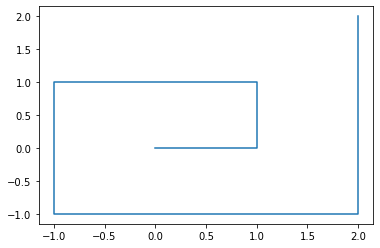

In [16]:
#Graph from getXandYForNum
plt.plot(x,y,'-')

<h2>Part 1 :</h2>

In [17]:
def printRandB(num):
  #get the x and y cordinates for the snail graph
  x2,y2 = getXandYForNum(num)
  #initialize list for prime number's x cordinates
  primenumx = []
  #initialize list for prime number's y cordinates
  primenumy = []
  #initialize list for non-prime number's x cordinates
  nonprimenumx = []
  #initialize list for non-prime number's y cordinates
  nonprimenumy = []
  #loop num times 
  for x in range(len(x2)):
    #increment number by 1 since the start number is 1
    numToCheck = x+1
    #if prime add it to prime list
    if(isprime(numToCheck)):
      primenumx.append(x2[x])
      primenumy.append(y2[x])
    else:
      #else if not prime add to not prime list
      nonprimenumx.append(x2[x])
      nonprimenumy.append(y2[x])
  #plot the non prime as red and the prime as blue
  plt.plot(primenumx,primenumy, 'ob')
  plt.plot(nonprimenumx,nonprimenumy, 'or')
  return primenumx,primenumy,nonprimenumx,nonprimenumy

<h4>Define printRandB(num)</h4>
It takes the given number and displays a snail graph for prime and non-prime numbers. The prime is represented as a blue color and the non-prime is represented as a red color. It also returns the X and Y cordinates for prime and non prime points

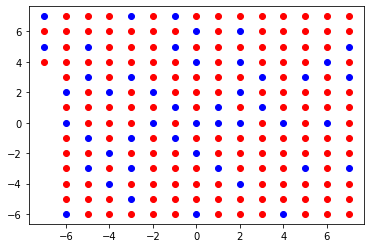

In [41]:
#example of printRandB(num)
a10,b10,c10,d10 = printRandB(200)

<h2>Exploration part 1</h2>
Let us exlore what happens when we plot the prime and non-prime numbers 150. The red will represent non-prime numbers and the will represent the prime numbers.

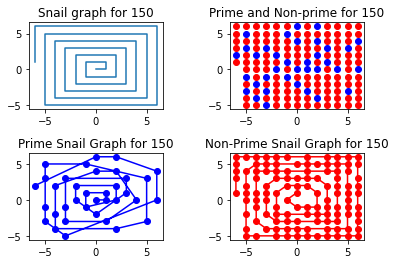

In [42]:
#example of printRandB(num)
a,b,c,d = printRandB(150)
plt.subplots_adjust(wspace =.5,hspace =.5)
plt.subplot(2,2,1)
plt.title("Snail graph for {num}".format(num = 150))
x,y = getXandYForNum(150)
plt.plot(x,y)

plt.subplot(2,2,2)
plt.title("Prime and Non-prime for {num}".format(num = 150))
printRandB(150)

plt.subplot(2,2,3)
plt.title("Prime Snail Graph for {num}".format(num= 150))
plt.plot(a,b,'o-b')

plt.subplot(2,2,4)
plt.title("Non-Prime Snail Graph for {num}".format(num=150))
plt.plot(c,d,'o-r')
plt.show()

Here you can notice that the prime and non-prime numbers have quite a few differences. In the base snail graph, it wraps around in a nice fashion. A similar pattern can be seen in the non prime snail graph. There is enough points to connect in each layer to represent a snail graph. On the other hand for the prime numbers, there is not always a direct left and right connection between the prime numbers. Here you can notice that at every layer there is at least one prime number but not enough to create a nice line connection between the points. The prime graph still wraps around but its in rigid fashion whereas non-prime numbers wrap around in a more staight fashion.

<h3>Further exploration</h3>
Let us further explore our findings.

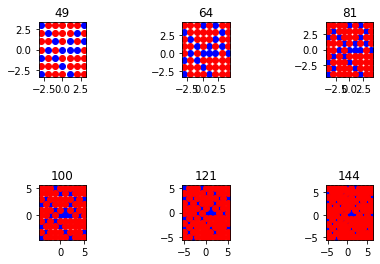

In [47]:
#example of printRandB(num)
plt.subplots_adjust(wspace =2,hspace =2)
plt.subplot(2,3,1)
plt.title("49")
printRandB(49)

plt.subplot(2,3,2)
plt.title("64")
printRandB(64)

plt.subplot(2,3,3)
plt.title("81")
printRandB(81)

plt.subplot(2,3,4)
plt.title("100")
printRandB(100)

plt.subplot(2,3,5)
plt.title("121")
printRandB(121)

plt.subplot(2,3,6)
plt.title("144")
printRandB(144)

plt.show()



As seen in our previous findings, while the number gets bigger, the blue points seems to be overwelmed by the amount of red points. In 144, you can barely see clumps of blue. To futher explore this I decided to show how prime numbers have a small correlation with each other whereas non prime numbers have a large correlation between each other. 

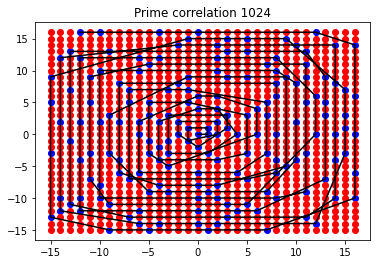

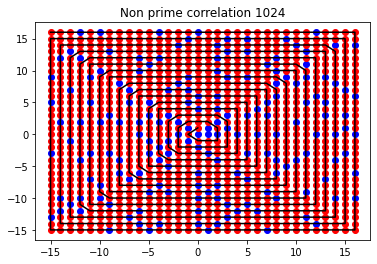

In [51]:
plt.title("Prime correlation 1024")
x1,y1,x2,y2 = printRandB(1024)
plt.plot(x1,y1,'-k')
plt.show()

plt.title("Non prime correlation 1024")
x3,y3,x4,y4 = printRandB(1024)
plt.plot(x4,y4,'-k')
plt.show()

As seen in the graph for 1024, there is almost no corraltion between prime numbers since the points are all over the place. In the Non-prime number graph, you can see a larger corraltion between them since wraps around in a clean fashion. A cool thing to notice is that even at a large number, there is still a prime number in each layer.

<h3>Conclusion for findings in part 1</h3>
There seems to be no corralation or not enough corraltion between the prime numbers to create a spiral structure. There still seems to be a prime number in each layer but there is not enough of them in the corners to create a spiral structure. There is also a lot more non-prime points that are clumped together whereas for prime numbers they are more spread apart

<h2>Part 2</h2>

In [21]:
#num is the number you want to go up to
def printBig(num):
  #get the x and y cordinates for snail graph
  x2,y2 = getXandYForNum(num)
  #list to store length of the prime dec of x
  length = []
  for x in range(1,len(x2)+1):
    #adds the length of the prime dec array to length
    length.append(len(primedec(x)))
  return x2, y2, length

<h4>Define printBig(num)</h4>
This function returns the x, y cordinates as well as the length of the prime decompositon of the number that correlate to the points

In [22]:
#Example of printBig(num)
x,y,length = printBig(10)
print(x,y,length)

[0, 1, 1, 0, -1, -1, -1, 0, 1, 2] [0, 0, 1, 1, 1, 0, -1, -1, -1, -1] [1, 1, 1, 2, 1, 2, 1, 3, 2, 2]


In [23]:
#num is the number you want to go up to
def printPrimeDecSize(num):
  #get the x, and length list
  x3,y3,length = printBig(num)
  #scale the point size to be bigger based on the length of the cordinate
  for i in range (len(x3)):
    #plot the point
    plt.scatter(x3[i],y3[i],s=10 *pow(length[i],2),color ='black' )
  #show the graph
  plt.show()

<h4>Define printPrimeDecSize(num):</h4>
This function brings together all resources needed to plot the graph and plots the dots which are scaled by length 

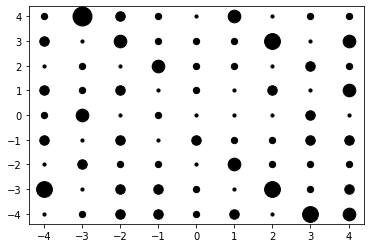

In [24]:
#example of printPrimeDecSize(num)
printPrimeDecSize(81)

<h2>Exploration part 2</h2>
The size of the point in the graph is directly linked to the length of the primary decomposition of the number. Let us explore on the correlation between the size of the point and prime/non-prime numbers

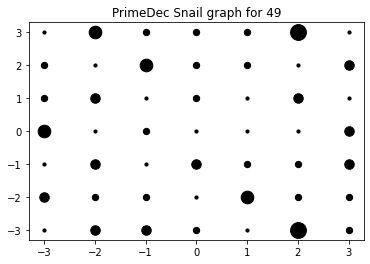

In [25]:

plt.subplots_adjust(wspace =.5,hspace =.5)

plt.title("PrimeDec Snail graph for {num}".format(num = 49))
printPrimeDecSize(49)


plt.show()

<h3>Further Exploration</h3>
Let us explore if we can see if there is a correlation between the size of the dots and prime/non-prime numbers

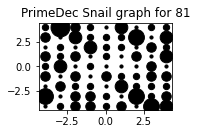

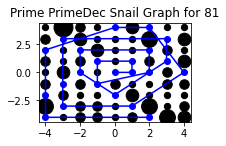

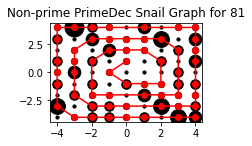

In [26]:
a,b,c,d = printRandB(81)
plt.subplots_adjust(wspace =.5,hspace =.5)
plt.subplot(2,2,1)
plt.title("PrimeDec Snail graph for {num}".format(num = 81))
printPrimeDecSize(81)

plt.subplot(2,2,2)
plt.title("Prime PrimeDec Snail Graph for {num}".format(num=81))
plt.plot(a,b,'o-b')
printPrimeDecSize(81)

plt.subplot(2,2,3)
plt.title("Non-prime PrimeDec Snail Graph for {num}".format(num=81))
plt.plot(c,d,'o-r')
printPrimeDecSize(81)

plt.show()

As you can see in the graphs, there is a direct correlation between the  size of the cordinate and prime/non-prime numbers.The blue represents the prime numbers and its the same size as the original start point whereas the points on the red line are much bigger. Let us further look at this with a better represention of my findings

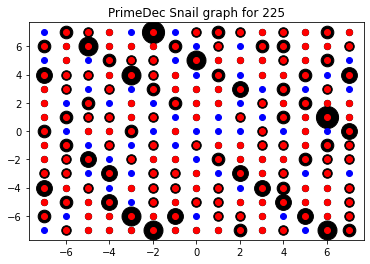

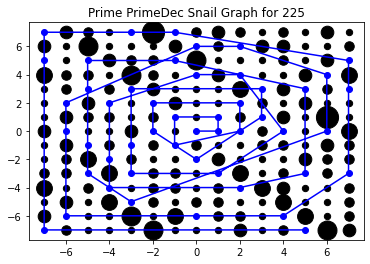

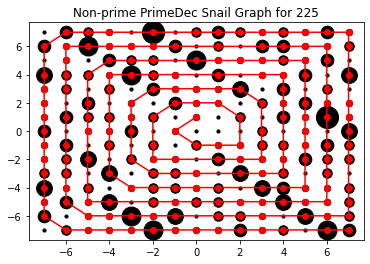

In [27]:
a,b,c,d = printRandB(225)
plt.subplots_adjust(wspace =.5,hspace =.5)

plt.title("PrimeDec Snail graph for {num}".format(num = 225))
printPrimeDecSize(225)


plt.title("Prime PrimeDec Snail Graph for {num}".format(num=225))
plt.plot(a,b,'o-b')
printPrimeDecSize(225)


plt.title("Non-prime PrimeDec Snail Graph for {num}".format(num=225))
plt.plot(c,d,'o-r')
printPrimeDecSize(225)

plt.show()

As seen from out previous outcome, this is a better representation to show the difference in dot sizes. there is not a single blue dot that is correlation by black.

<h3>Conclusion for findings in Part 2</h3>
My conclusion for part 2 is that there is a direct correlation between the size of the primedec dots to whether a number is prime or not. This makes sense since a primary decompositon will always break down the number by prime numbers but if the number is prime then the length of that list is only 1 if you exclude the 1.

<h2>Part 3:</h2

In [28]:
def oddList(num):
  #list for odd numbers
  oddList = []
  #loop to num and if odd add it to odd list
  for i in range ((num)+1):
    if(i%2==1):
      oddList.append(i)
  return oddList

<h4>Define oddList(num)</h4>
This function takes in a number and returns a list of odd numbers up to num

In [29]:
#example
print(oddList(10))

[1, 3, 5, 7, 9]


In [30]:
def oddLengths(num):
  #get list of odd numbers
  listofOdds = oddList(num)
  #length of the odd list
  lenOfOdd = len(listofOdds)
  #get cordinates for lenOfOdd points
  x2,y2 = getXandYForNum(lenOfOdd)
  #store the length of primedec size for the odd number
  length = []
  #loop to the length of odd numbers
  for x in range ((lenOfOdd)):
    #add the length of the primedec to length array
    primedecLen = len(primedec(listofOdds[x]))
    length.append(primedecLen)
  return x2,y2,length


<h4>Define oddLengths(num)</h4>
 oddLengths(num) takes in a number and returns the x,y cordinates for the snail graph as well as the length of the primary decomposition of the odd numbers

In [31]:
#Example of oddLenths(num)
print(oddLengths(10))

([0, 1, 1, 0, -1], [0, 0, 1, 1, 1], [1, 1, 1, 1, 2])


In [32]:
def printOddPrime(num):
  #gets a list of odd numbers
  listofOdds = oddList(num)
  #gets the lenth of the odd number list
  lenOfOdd = len(listofOdds)
  #get the cordinates for the length of odd
  x2,y2 = getXandYForNum(lenOfOdd)
  #list to hold the prime odd and non prime odd x and y cordinates
  primenumx = []
  primenumy = []
  nonprimenumx = []
  nonprimenumy = []
  #loop through the length of odd list
  for x in range (len(listofOdds)):
    #if prime add it to the prime list and if not prime add it to the non prime list
    if(isprime(listofOdds[x])):
      primenumx.append(x2[x])
      primenumy.append(y2[x])
    else:
      nonprimenumx.append(x2[x])
      nonprimenumy.append(y2[x])
   
  return primenumx,primenumy,nonprimenumx,nonprimenumy

<h4>Define printOddPrime(num)</h4>
printOddPrime(num) takes in a number, turns it into a list of odd numbers and get cordinates that represent those odd numbers. It then determines whether a number is prime or not and adds them to their respected list

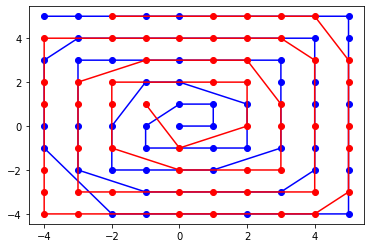

In [33]:
#example of printOddPrime(num)
a,b,c,d = printOddPrime(200)
plt.plot(a,b,'o-b')
plt.plot(c,d,'o-r')

<h2>Exploration part 3</h2>
Let us explore how the snail graph looks like with prime and non-prime odd numbers. The red cordinates represents non-prime odd numbers and the blue cordinates represents prime odd numbers. <br>Let us begin with a small number and slowly go up to see if there is any patterns.

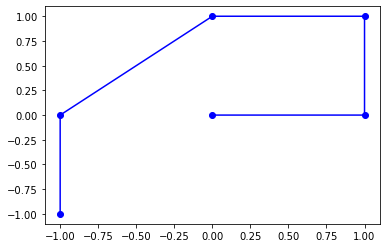

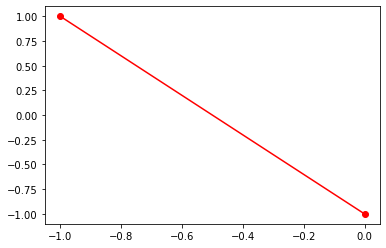

In [34]:
a,b,c,d = printOddPrime(16)

plt.plot(a,b,'o-b')
plt.show()

plt.plot(c,d,'o-r')
plt.show()

What I noticed where is that the red doesn't have a snail shape. This is due to the number 16 not having a lot of non-prime odd numbers. The odd numbers of 16 is -> [1,3,5,7,9,11,13,15]. There is only 2 non prime odd numbers in 16. Let us explore what the graph would look like for a larger number to see if there is a difference.


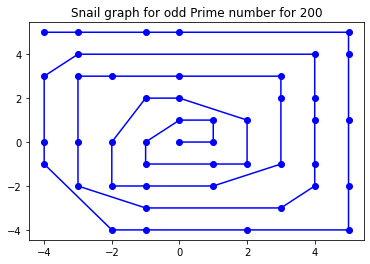

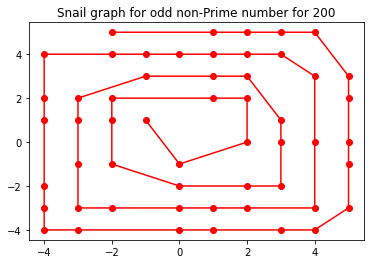

In [35]:
a,b,c,d = printOddPrime(200)
plt.title("Snail graph for odd Prime number for 200")
plt.plot(a,b,'o-b')
plt.show()
plt.title("Snail graph for odd non-Prime number for 200")
plt.plot(c,d,'o-r')
plt.show()

Here we see something completely different from the small numbers. Both graphs are ble to form somewhat of a snail graph. This is completely different from the normal number's prime and non-prime. I think this is primary due to the fact that all even numbers can be divisible by 2 so even numbers will never be prime numbers. Since the points are representing only odd numbers, there are more points in each layer that allows it to create a clean looking snail graph. Let us compare the normal prime number snail graph with the odd prime umber snail graph to see the difference

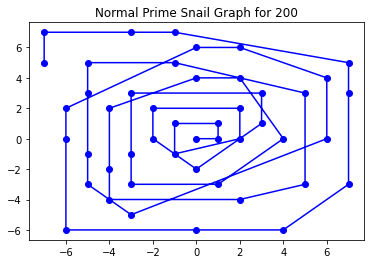

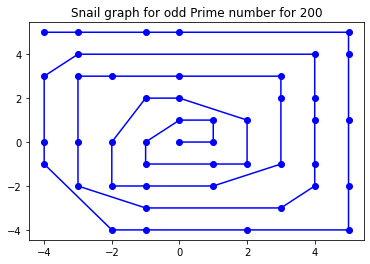

In [44]:

plt.title("Normal Prime Snail Graph for {num}".format(num= 200))
plt.plot(a10,b10,'o-b')
plt.show()

a,b,c,d = printOddPrime(200)
plt.title("Snail graph for odd Prime number for 200")
plt.plot(a,b,'o-b')
plt.show()


As you can see here, the normal numbers had less correlation with prime numbers so the graph didn't wrap around nicely. You can notice here that prime numbers sometimes didn't have a corner in the normal prime snail graph whereas for the odd number prime graph, there is a lot more corners. Also none of the points in the snail graph for odd prime numbers overlapped. The overlap is due to not having enough prime points for it to keep a straight line.

In [52]:
#num is the number
def printOddDecSize(num):
  #get the length of odd number and x,y points 
  x3,y3,length = oddLengths(num)
  #loop and plot the points here the points increase by length
  for i in range (len(x3)):
    plt.scatter(x3[i],y3[i],s=10 *pow(length[i],2),color ='blue' )
  plt.show()

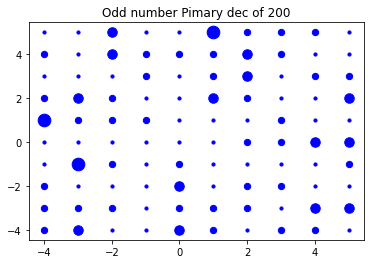

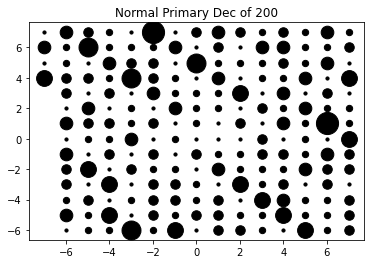

In [56]:
#example of printOddDecSize(num):
plt.title("Odd number Pimary dec of 200")
printOddDecSize(200)
plt.title("Normal Primary Dec of 200")
printPrimeDecSize(200)

We can see here that the pimary decomopositon length for odd numbers is a lot less than the primary decompositons of even numbers

<h1>Conclusion :</h1>
From my findings within this project. I find that there is a direct correlation between the shape of the snail graph and prime numbers. The number being odd also has a huge impact on the shape of the graph. This is due to there being more prime numbers in odd numbers than even numbers. Since in the normal numbers, the prime numbers are very far off, the shape of the snail graph seems to reflect that and it overlaps. This ruins the shape of the snail graph. Whereas in the odd numbers, the prime numbers are a lot closer together and the graph shows that since there is no overlaps in the points. <br><br>
Another unique thing that I found about the snail graph is that for normal numbers, the size of the snail graph seems to increase by every other square. For example, 1,9,25 will all increase the layer of the snail graph by 1.
<br><br>
The primary decomposition length is also affected by whether or not the number is prime. This is due to prime numbers only being able to divide by 1 and itself. The size of the primedec is always going to be 1 for prime numbers if you exlcude the 1. The size of the primedec is also a lot smaller in odd number than they are in even numbers. This is primary due to the fact that even numbers can always be broken down by using 2 whereas odd numbers cannot, therefore they have less options for their primary decompositions. 